In [1]:

!pip install nltk pandas yake multi_rake keybert re

--2024-05-31 06:30:52--  https://raw.githubusercontent.com/protontypes/AwesomeCure/main/csv/projects_with_readmes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13679277 (13M) [text/plain]
Saving to: ‘projects_with_readmes.csv’

projects_with_readm 100%[===================>]  13.04M  --.-KB/s    in 0.1s    

2024-05-31 06:30:52 (95.9 MB/s) - ‘projects_with_readmes.csv’ saved [13679277/13679277]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 705.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1932, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,910,semanticClimate,Conversion of IPCC documents into semantic form.,https://github.com/petermr/semanticClimate,2024-05-31 06:31:15.087000+00:00,"{'uuid': '499415613', 'full_name': 'petermr/se...","{'login': 'petermr', 'name': None, 'uuid': '73...",[],"{'full_name': 'petermr/semanticClimate', 'defa...","{'full_name': 'petermr/semanticClimate', 'html...","{'total': {'IssuesEvent': 10, 'WatchEvent': 30...",[],"[{'ecosystem': 'pypi', 'filepath': 'abbreviati...",6.467699,2023-09-11 11:54:36.313000+00:00,2024-05-31 06:31:15.090000+00:00,https://github.com/petermr.png,HTML,Climate Change,Climate Data Processing and Analysis,0,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/910,https://ost.ecosyste.ms/projects/910
1,27454,FMS Coupler,A software framework for supporting the effici...,https://github.com/NOAA-GFDL/FMScoupler,2024-05-31 05:30:14.862000+00:00,"{'id': 33064816, 'uuid': '36701409', 'full_nam...","{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",[],"{'full_name': 'NOAA-GFDL/FMScoupler', 'default...","{'full_name': 'NOAA-GFDL/FMScoupler', 'html_ur...","{'total': {'CreateEvent': 97, 'CommitCommentEv...",[],"[{'ecosystem': 'actions', 'filepath': '.github...",7.064759,2023-09-12 07:40:18.730000+00:00,2024-05-31 05:30:14.864000+00:00,https://github.com/NOAA-GFDL.png,Fortran,Climate Change,Earth and Climate Modeling,0,![Build Status](https://github.com/NOAA-GFDL/F...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/27454,https://ost.ecosyste.ms/projects/27454
2,193157,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",https://github.com/nychealth/eh-dataportal,2024-05-31 05:01:21.171000+00:00,"{'id': 49615238, 'uuid': '508297840', 'full_na...","{'login': 'nychealth', 'name': 'NYC Department...",[],"{'full_name': 'nychealth/eh-dataportal', 'defa...","{'full_name': 'nychealth/eh-dataportal', 'html...",None,[],"[{'ecosystem': 'actions', 'filepath': '.github...",NaN,2024-05-21 00:17:09.961000+00:00,2024-05-31 05:01:21.173000+00:00,https://github.com/nychealth.png,HTML,Sustainable Development,Data Catalogs and Interfaces,0,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/193157,https://ost.ecosyste.ms/projects/193157
3,193112,CoachCO2,Aims to raise user awareness about their carbo...,https://github.com/cozy/coachco2,2024-05-31 05:00:45.092000+00:00,"{'id': 36961619, 'uuid': '419674297', 'full_na...","{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[],"{'full_name': 'cozy/coachco2', 'default_branch...","{'full_name': 'cozy/coachco2', 'html_url': 'ht...",None,[],"[{'ecosystem': 'npm', 'filepath': 'package.jso...",NaN,2024-05-21 00:04:55.498000+00:00,2024-05-31 05:00:45.094000+00:00,https://github.com/cozy.png,JavaScript,Consumption,Mobility and Transportation,0,[![Travis build status shield](https://img.shi...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/193112,https://ost.ecosyste.ms/projects/193112
4,193159,ingestr,Provides functions to extract environmental po...,https://github.com/geco-bern/ingestr,2024-05-31 05:00:20.986000+00:00,"{'id': 44676963, 'uuid': '238214055', 'full_na...","{'login': 'geco-bern', 'name': 'GECO', 'uuid':...",[],"{'full_name': 'geco-bern/ingestr', 'default_br...","{'full_name': 'geco-bern/ingestr', 'html_url':...","{'total': {'IssuesEvent': 5, 'WatchEvent': 30,...",[],"[{'ecosystem': 'cran', 'filepath': 'DESCRIPTIO...",NaN,2024-05-21 00:17:46.189000+00:00,2024-05-31 05:00:20.988000+00:00,https://github.com/geco-bern.png,R,Sustainable Development,Curated Lists,0,[![R-CMD-check](https://github.com/geco-bern/i...,[],[http://dx.doi.org/10.1016/j.geoderma.2016.01....,{},{},0,https://ost.ecosyste.ms/api/v1/projects/193159,https://ost.ecosyst

In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
len(raw)

1932

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  273
Consumption                267
Climate Change             234
Energy Systems             207
Natural Resources          173
Sustainable Development    166
Hydrosphere                135
Renewable Energy           127
Atmosphere                 123
Emissions                   90
Industrial Ecology          53
Cryosphere                  49
Energy Storage              35
Name: count, dtype: int64

In [12]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Biodiversity and Species Distribution        79
Water Supply                                 79
Mobility and Transportation                  73
Buildings and Heating                        70
Agriculture and Nutrition                    66
Soil and Land                                64
Photovoltaics and Solar Energy               59
Climate Data Processing and Analysis         56
Forest Observation and Management            55
Freshwater and Hydrology                     54
Computation and Communication                53
Meteorological Observation and Forecast      51
Marine Life and Fishery                      49
Earth and Climate Modeling                   48
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Energy Distribution and Grids                43
Climate Data Access and Visualization        43
Data Catalogs and Interfaces                 43
Wind Energy                

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,semanticClimate,Conversion of IPCC documents into semantic form.,Climate Change,Climate Data Processing and Analysis,"{'login': 'petermr', 'name': None, 'uuid': '73...",None
1,FMS Coupler,A software framework for supporting the effici...,Climate Change,Earth and Climate Modeling,"{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",![Build Status](https://github.com/NOAA-GFDL/F...
2,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",Sustainable Development,Data Catalogs and Interfaces,"{'login': 'nychealth', 'name': 'NYC Department...",None
3,CoachCO2,Aims to raise user awareness about their carbo...,Consumption,Mobility and Transportation,"{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[![Travis build status shield](https://img.shi...
4,ingestr,Provides functions to extract environmental po...,Sustainable Development,Curated Lists,"{'login': 'geco-bern', 'name': 'GECO', 'uuid':...",[![R-CMD-check](https://github.com/geco-bern/i...


# 2. Sample Row

In [16]:
import re
import yake

In [17]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

NameError: name 'clean_sample3' is not defined

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [19]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [20]:
from keybert import KeyBERT

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [22]:
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [39]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [40]:
# Combine text columns
combined = df['description']

In [41]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined,cleaned_text
0,semanticClimate,Conversion of IPCC documents into semantic form.,Climate Change,Climate Data Processing and Analysis,"{'login': 'petermr', 'name': None, 'uuid': '73...",None,Conversion of IPCC documents into semantic form.,conversion documents semantic form climate cli...
1,FMS Coupler,A software framework for supporting the effici...,Climate Change,Earth and Climate Modeling,"{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",![Build Status](https://github.com/NOAA-GFDL/F...,A software framework for supporting the effici...,framework supporting efficient development con...
2,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",Sustainable Development,Data Catalogs and Interfaces,"{'login': 'nychealth', 'name': 'NYC Department...",None,"Shows how environments affect health in NYC, b...",shows environments affect health publishing ex...
3,CoachCO2,Aims to raise user awareness about their carbo...,Consumption,Mobility and Transportation,"{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[![Travis build status shield](https://img.shi...,Aims to raise user awareness about their carbo...,aims raise awareness carbon footprint notably ...
4,ingestr,Provides functions to extract environmental po...,Sustainable Development,Curated Lists,"{'login': 'geco-bern', 'name': 'GECO', 'uuid':...",[![R-CMD-check](https://github.com/geco-bern/i...,Provides functions to extract environmental po...,provides functions extract environmental point...


In [42]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [156]:
# More words to remove
words_black_list = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple'
                    'repository','example','docs','files','information','models','software','available',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [152]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords


In [153]:
df['cleaned_text']

0                      conversion documents semantic form
1       supporting efficient development construction ...
2       shows environments affect health publishing ex...
3       raise awareness carbon footprint notably trans...
4       extract environmental point global remote serv...
                              ...                        
1927    improve control monitoring fishing vessels act...
1928    transparent collaborative evidence approach es...
1929    suite aimed supporting complex context decisio...
1930    sustainable companies change initiatives visib...
1931    collect measure evaluate improve effectiveness...
Name: cleaned_text, Length: 1932, dtype: object

# 4. Unique Words

* Let's get a look at the most common words in our cleaned_text column

In [154]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [167]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(200)
word_freq

[('energy', 285),
 ('climate', 219),
 ('package', 202),
 ('analysis', 135),
 ('modeling', 109),
 ('water', 109),
 ('power', 99),
 ('global', 93),
 ('carbon', 79),
 ('weather', 79),
 ('earth', 79),
 ('environmental', 78),
 ('emissions', 68),
 ('wind', 64),
 ('ocean', 57),
 ('atmospheric', 54),
 ('change', 53),
 ('soil', 52),
 ('electricity', 50),
 ('building', 49),
 ('solar', 48),
 ('land', 47),
 ('assessment', 47),
 ('surface', 46),
 ('world', 45),
 ('quality', 43),
 ('science', 43),
 ('forest', 41),
 ('species', 41),
 ('consumption', 36),
 ('integrated', 36),
 ('process', 36),
 ('national', 34),
 ('development', 33),
 ('environment', 33),
 ('biodiversity', 32),
 ('modelling', 30),
 ('monitoring', 30),
 ('transport', 29),
 ('satellite', 29),
 ('meteorological', 29),
 ('forecasting', 29),
 ('marine', 29),
 ('generation', 28),
 ('flexible', 28),
 ('impact', 28),
 ('visualization', 28),
 ('plant', 27),
 ('well', 27),
 ('plants', 27),
 ('tree', 26),
 ('point', 25),
 ('resolution', 25),
 ('

In [168]:
!pip install wordcloud

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

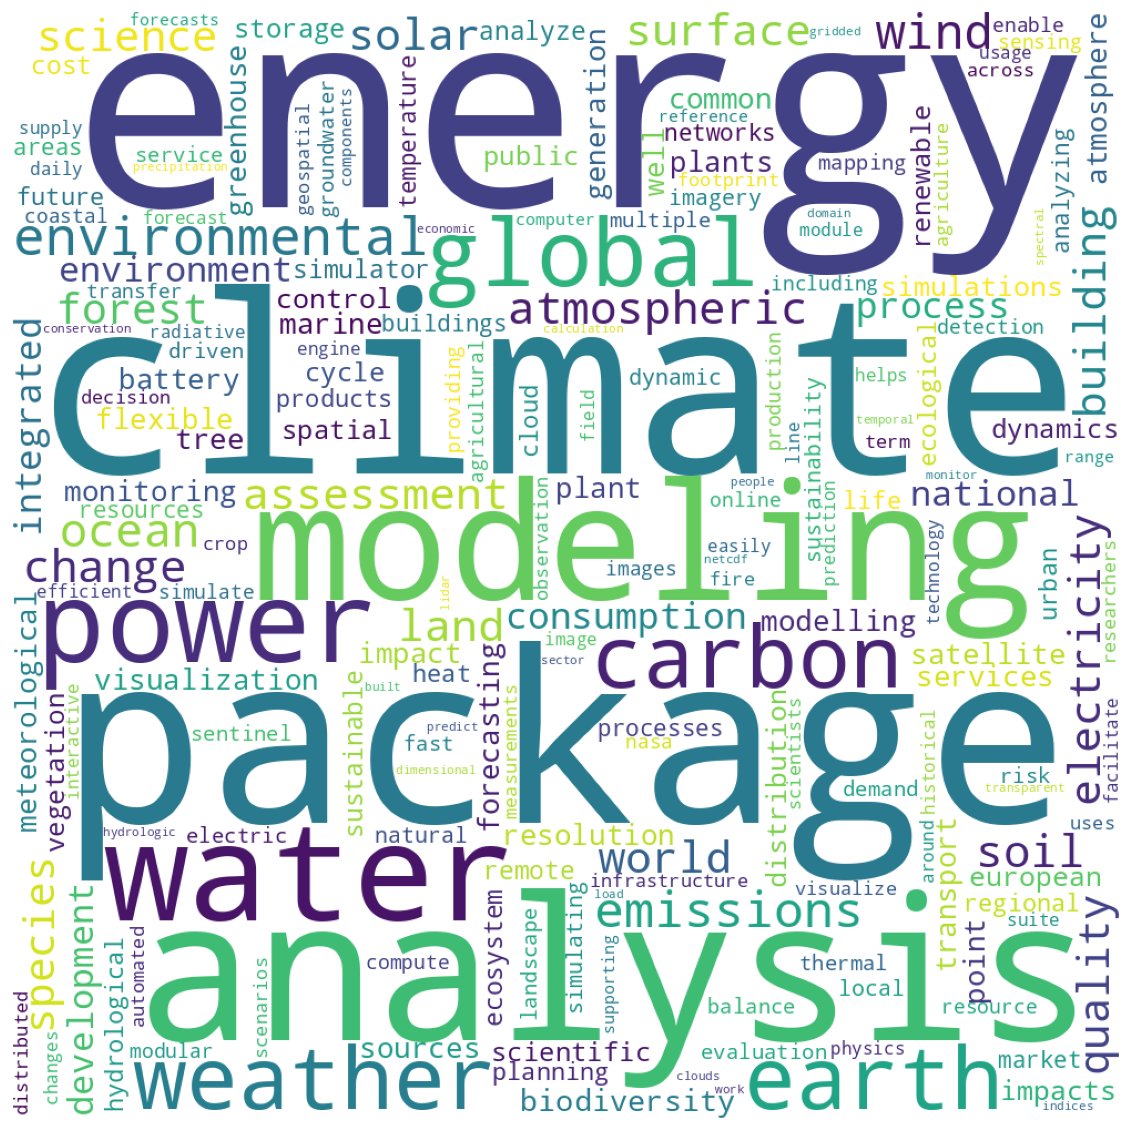

In [186]:
wc = WordCloud(background_color="white", max_words=200,width=1000,height=1000)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

* We should also look at the most common bigrams and trigrams

In [114]:
df['cleaned_text'].str.split()

0                 [conversion, documents, semantic, form]
1       [supporting, efficient, development, construct...
2       [shows, environments, affect, health, publishi...
3       [raise, awareness, carbon, footprint, notably,...
4       [extract, environmental, point, global, remote...
                              ...                        
1927    [improve, control, monitoring, fishing, vessel...
1928    [transparent, collaborative, evidence, approac...
1929    [suite, aimed, supporting, complex, numerical,...
1930    [sustainable, companies, initiatives, visible,...
1931    [collect, measure, evaluate, improve, effectiv...
Name: cleaned_text, Length: 1932, dtype: object

In [115]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [116]:
len(words)

15146

In [117]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame('count')

In [118]:
bigrams.head(30)

,count
"(energy, consumption)",20
"(remote, sensing)",17
"(renewable, energy)",16
"(life, cycle)",15
"(water, quality)",15
"(radiative, transfer)",14
"(energy, modeling)",14
"(weather, climate)",12
"(earth, science)",11
"(integrated, assessment)",11


In [70]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

(life, cycle, assessment)                    9
(sustainable, development, goals)            6
(numerical, weather, prediction)             5
(environment, climate, canada)               4
(groundwater, surface, water)                3
(integer, linear, programming)               3
(lidar, point, clouds)                       3
(past, present, future)                      3
(fisheries, stock, assessment)               3
(world, protected, areas)                    3
(mixed, integer, linear)                     3
(network, common, form)                      3
(domain, specific, language)                 3
(nasa, earth, science)                       3
(global, biodiversity, facility)             3
(point, clouds, provide)                     3
(unidata, network, common)                   3
(whole, building, energy)                    3
(common, form, netcdf)                       3
(atmospheric, oceanic, climate)              3
(libraries, provide, implementation)         3
(distributed,

#6. Further Work

* Further reduce the number of unique keywords by removing irrelevant words
* Create a list of topics/subtopics that we want
* Define features (words, bigrams, trigrams)
* cosine similarity to get similar projects
